In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk

from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from textblob import TextBlob
from langdetect import detect

nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /Users/mattwork/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/mattwork/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
# Import SVVSD school district web scrape 
sv_df = pd.read_csv('scraped_data.csv')

In [4]:
# Function that preprocesses the text, tokenizing, removing stop words, stemming, and re-adding stemmed words.
def preprocess_text(text):
  words = word_tokenize(text)

  stop_words = set(stopwords.words('english'))
  words = [word for word in words if word.lower() not in stop_words]

  ps = PorterStemmer()
  words = [ps.stem(word) for word in words]

  preprocessed_text = " ".join(words)

  return preprocessed_text

In [5]:
# Function to analyze sentiment using textblob
def analyze_sentiment(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity

In [6]:
# Apply preprocessing and sentiment analysis to the crawled text column
sv_df["Cleaned Text"] = sv_df["Cleaned Text"].astype(str).apply(preprocess_text) 
sv_df["Sentiment"] = sv_df["Cleaned Text"].astype(str).apply(analyze_sentiment) 

In [7]:
sv_df.head()

,URL,Cleaned Text,Sentiment
0,https://www.svvsd.org,st vrain valley school academ excel design ski...,0.185806
1,https://www.svvsd.org/es/,st vrain valley school excelencia académica po...,0.009259
2,https://www.svvsd.org/,st vrain valley school academ excel design ski...,0.185806
3,https://www.svvsd.org/schools/inclement-weather/,inclement weather st vrain valley school skip ...,0.110911
4,https://www.svvsd.org/es/schools/inclement-wea...,inclemencia meteorológica st vrain valley scho...,0.060000


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


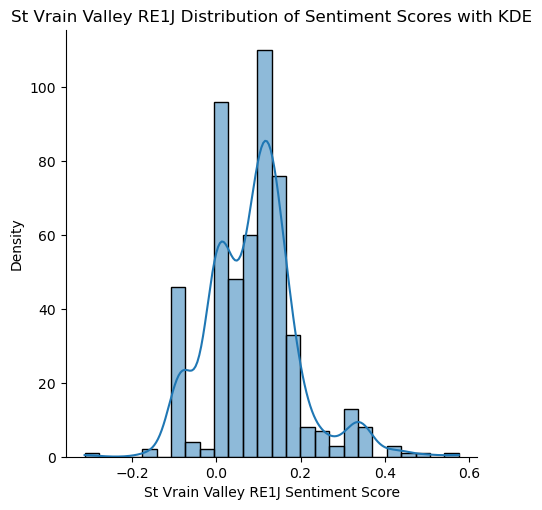

In [8]:
# Distribution plot of the sentiment analysis of the website scrape
sns.displot(sv_df['Sentiment'], kde=True)
plt.xlabel('St Vrain Valley RE1J Sentiment Score')
plt.ylabel('Density')
plt.title('St Vrain Valley RE1J Distribution of Sentiment Scores with KDE')
plt.savefig("St Vrain Valley RE1J Score.png", bbox_inches='tight')
plt.show()

In [9]:
# Import District 49 school district web scrape 
d49_df = pd.read_csv('d49_scraped_data.csv')

In [10]:
# Apply preprocessing and sentiment analysis to the crawled text column
d49_df["Cleaned Text"] = d49_df["Cleaned Text"].astype(str).apply(preprocess_text) 
d49_df["Sentiment"] = d49_df["Cleaned Text"].astype(str).apply(analyze_sentiment) 

In [11]:
d49_df.head()

,URL,Cleaned Text,Sentiment
0,https://www.d49.org,school district 49 homepag skip main content d...,0.244440
1,https://www.d49.org/Domain/4,school district 49 homepag skip main content d...,0.244440
2,https://www.d49.org/Domain/9,falcon high school homepag skip main content d...,0.129767
3,https://www.d49.org/Domain/10,falcon middl school homepag skip main content ...,0.202592
4,https://www.d49.org/Domain/11,falcon elementari school technolog homepag ski...,0.221005


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


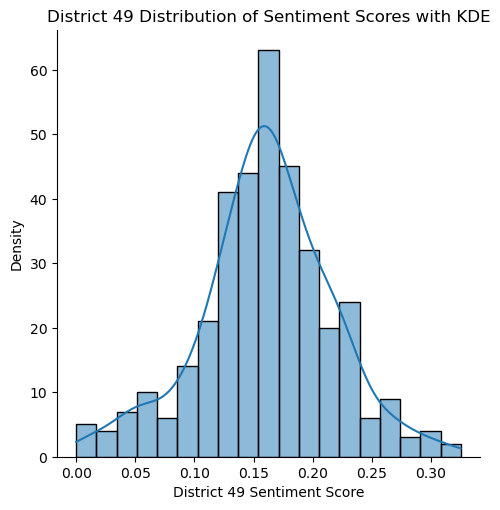

In [13]:
# Distribution plot of the sentiment analysis of the website scrape
sns.displot(d49_df['Sentiment'], kde=True)
plt.xlabel('District 49 Sentiment Score')
plt.ylabel('Density')
plt.title('District 49 Distribution of Sentiment Scores with KDE')
plt.savefig("District 49 Sentiment Score.png", bbox_inches='tight')
plt.show()